In [12]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data

In [2]:
raw_train = pd.read_csv("../data/raw/20220420_amazon_reviews_train.csv")
raw_train.shape

(10595, 7)

In [42]:
t = raw_train.groupby(["prod_id", "polarity"], as_index=False).agg("count")[["prod_id", "polarity", "review"]]
t[t["review"] < 5]

,prod_id,polarity,review
31,B00002NAOH,positive,4
206,B000NY6P7K,negative,3
274,B001BDJ2Q8,negative,4
306,B001PMC8T8,negative,4
438,B00HGAD9VE,negative,4
466,B00QZPGZ3A,negative,4
484,B00XZYLRHS,negative,4


In [36]:
import random

In [37]:
random.randint(0, 0)

0

In [3]:
raw_valid = pd.read_csv("../data/raw/20220420_amazon_reviews_valid.csv")
raw_valid.shape

(4525, 7)

In [4]:
raw_test = pd.read_csv("../data/raw/20220420_amazon_reviews_test.csv")
raw_test.shape

(3105, 7)

#### Combine `train` and `valid`

In [8]:
raw_train_valid = pd.concat([raw_train, raw_valid])
raw_train_valid.shape

(15120, 7)

## Analysis of `category` attribute

In [9]:
df = raw_train_valid.copy()

In [18]:
print(f"{df['category'].unique().shape[0]} categories")

24 categories


In [25]:
df["category"].value_counts()

Software                      962
Home_and_Kitchen              920
Patio_Lawn_and_Garden         905
Musical_Instruments           863
Pet_Supplies                  862
Sports_and_Outdoors           860
Tools_and_Home_Improvement    854
Books                         847
Electronics                   815
Arts_Crafts_and_Sewing        807
Automotive                    803
All_Beauty                    802
Industrial_and_Scientific     801
Office_Products               800
CDs_and_Vinyl                 563
Grocery_and_Gourmet_Food      539
AMAZON_FASHION                352
Luxury_Beauty                 306
Prime_Pantry                  303
Clothing_Shoes_and_Jewelry    276
Toys_and_Games                254
Video_Games                   229
Movies_and_TV                 224
Appliances                    173
Name: category, dtype: int64

In [35]:
catg_count = df["category"].value_counts().to_frame().reset_index().rename(columns={"category":"count", "index":"category"})

<AxesSubplot:ylabel='Frequency'>

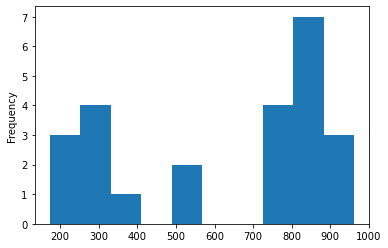

In [141]:
df["category"].value_counts().plot(kind='hist')

In [86]:
print(f"{round(100 * catg_count[catg_count['count'] >= 500].shape[0] / catg_count.shape[0], 2)}% of categories have at least 500 reviews.")
print(f"{round(100 * catg_count[catg_count['count'] < 400].shape[0] / catg_count.shape[0], 2)}% of categories have less than 500 reviews.")

66.67% of categories have at least 500 reviews.
33.33% of categories have less than 500 reviews.


In [85]:
print(f"{round(100 * catg_count.loc[catg_count['count'] >= 500, 'count'].sum() / catg_count['count'].sum(), 2)}% ({catg_count.loc[catg_count['count'] >= 500, 'count'].sum()}) of reviews are from categories having at least 500 reviews.")
print(f"{round(100 * catg_count.loc[catg_count['count'] >= 800, 'count'].sum() / catg_count['count'].sum(), 2)}% ({catg_count.loc[catg_count['count'] >= 800, 'count'].sum()}) of reviews are from categories having at least 800 reviews.")
print(f"{round(100 * catg_count.loc[(catg_count['count'] < 800) & (catg_count['count'] >= 500), 'count'].sum() / catg_count['count'].sum(), 2)}% ({catg_count.loc[(catg_count['count'] < 800) & (catg_count['count'] >= 500), 'count'].sum()}) of reviews are from categories having between 500 and 800 reviews.")
print("-"*80)
print(f"{round(100 * catg_count.loc[catg_count['count'] < 400, 'count'].sum() / catg_count['count'].sum(), 2)}% of reviews are from categories having less than 400 reviews.")
print(f"{round(100 * catg_count.loc[catg_count['count'] < 300, 'count'].sum() / catg_count['count'].sum(), 2)}% of reviews are from categories having less than 300 reviews.")

86.0% (13003) of reviews are from categories having at least 500 reviews.
78.71% (11901) of reviews are from categories having at least 800 reviews.
7.29% (1102) of reviews are from categories having between 500 and 800 reviews.
--------------------------------------------------------------------------------
14.0% of reviews are from categories having less than 400 reviews.
7.65% of reviews are from categories having less than 300 reviews.


<AxesSubplot:>

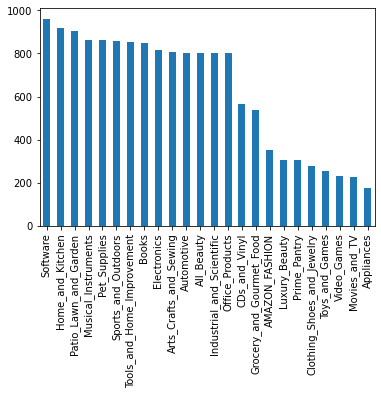

In [27]:
df["category"].value_counts().plot.bar()

#### Categories with less than 800 total reviews

In [91]:
catg_count.loc[catg_count['count'] < 800, 'category']

14                 CDs_and_Vinyl
15      Grocery_and_Gourmet_Food
16                AMAZON_FASHION
17                 Luxury_Beauty
18                  Prime_Pantry
19    Clothing_Shoes_and_Jewelry
20                Toys_and_Games
21                   Video_Games
22                 Movies_and_TV
23                    Appliances
Name: category, dtype: object

#### Categories with at least 800 total reviews

In [93]:
catg_count.loc[catg_count['count'] >= 800, 'category']

0                       Software
1               Home_and_Kitchen
2          Patio_Lawn_and_Garden
3            Musical_Instruments
4                   Pet_Supplies
5            Sports_and_Outdoors
6     Tools_and_Home_Improvement
7                          Books
8                    Electronics
9         Arts_Crafts_and_Sewing
10                    Automotive
11                    All_Beauty
12     Industrial_and_Scientific
13               Office_Products
Name: category, dtype: object

## Build new `train`/`valid` sets

In [98]:
new_train_valid = df[df["category"].apply(lambda x: str(x) in catg_count.loc[catg_count['count'] >= 800, 'category'].values)]
new_train_valid.shape

(11901, 7)

In [99]:
new_train_valid.head()

,category,prod_id,rating,polarity,review,review_len,review_id
281,All_Beauty,B005U5KU46,5.0,positive,"These are very thin, pull off easily without r...",45,0
282,All_Beauty,B005U5KU46,1.0,negative,sweat went right thought within almost 2 hrs o...,14,1
283,All_Beauty,B005U5KU46,2.0,negative,So far they haven't really worked - won't stic...,15,2
284,All_Beauty,B005U5KU46,5.0,positive,"I have tried several brands of shields, and mo...",46,3
285,All_Beauty,B005U5KU46,1.0,negative,They do not stick well to the fabric. Bunch up...,12,4


## Exploratory analysis

In [100]:
new_df = new_train_valid.copy()

In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11901 entries, 281 to 4412
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    11901 non-null  object 
 1   prod_id     11901 non-null  object 
 2   rating      11901 non-null  float64
 3   polarity    11901 non-null  object 
 4   review      11901 non-null  object 
 5   review_len  11901 non-null  int64  
 6   review_id   11901 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 743.8+ KB


### category

#### Number of reviews per category

In [102]:
new_df["category"].value_counts()

Software                      962
Home_and_Kitchen              920
Patio_Lawn_and_Garden         905
Musical_Instruments           863
Pet_Supplies                  862
Sports_and_Outdoors           860
Tools_and_Home_Improvement    854
Books                         847
Electronics                   815
Arts_Crafts_and_Sewing        807
Automotive                    803
All_Beauty                    802
Industrial_and_Scientific     801
Office_Products               800
Name: category, dtype: int64

### prod_id

In [118]:
print(f"{new_df['prod_id'].unique().shape[0]} produts")

293 produts


#### Number of products per category

In [123]:
new_df[["category", "prod_id"]].groupby(["category", "prod_id"], as_index=False).agg("count").groupby(["category"], as_index=False).agg("count").rename(columns={"prod_id":"num_products"})

,category,num_products
0,All_Beauty,22
1,Arts_Crafts_and_Sewing,16
2,Automotive,25
3,Books,14
4,Electronics,27
5,Home_and_Kitchen,16
6,Industrial_and_Scientific,27
7,Musical_Instruments,29
8,Office_Products,25
9,Patio_Lawn_and_Garden,16


#### Number of reviews per product

In [205]:
revs_per_prods = new_df.groupby(["prod_id"], as_index=False).count().rename(columns={"review":"num_reviews"})["num_reviews"]

<AxesSubplot:ylabel='Frequency'>

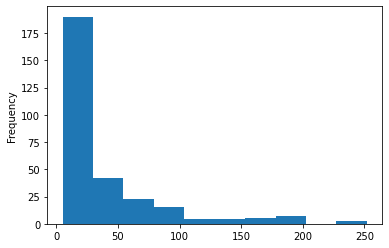

In [206]:
revs_per_prods.plot.hist()

In [207]:
revs_per_prods.describe()

count    293.000000
mean      40.617747
std       43.973731
min        5.000000
25%       16.000000
50%       22.000000
75%       45.000000
max      252.000000
Name: num_reviews, dtype: float64

In [223]:
print(f"{round(100*revs_per_prods[revs_per_prods <= 15].shape[0]/revs_per_prods.shape[0], 2)}% of products have 15 reviews or less")
print(f"{round(100*revs_per_prods[revs_per_prods <= 50].shape[0]/revs_per_prods.shape[0], 2)}% of products have 50 reviews or less")
print(f"{round(100*revs_per_prods[revs_per_prods <= 100].shape[0]/revs_per_prods.shape[0], 2)}% of products have 100 reviews or less")
print(f"{round(100*revs_per_prods[revs_per_prods <= 150].shape[0]/revs_per_prods.shape[0], 2)}% of products have 150 reviews or less")
print(f"{round(100*revs_per_prods[revs_per_prods <= 200].shape[0]/revs_per_prods.shape[0], 2)}% of products have 200 reviews or less")

23.55% of products have 15 reviews or less
78.16% of products have 50 reviews or less
91.13% of products have 100 reviews or less
94.88% of products have 150 reviews or less
98.63% of products have 200 reviews or less


<AxesSubplot:ylabel='Frequency'>

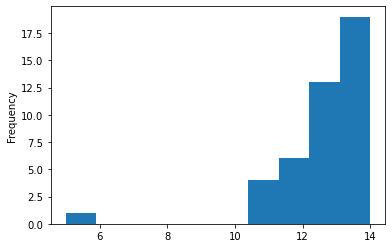

In [222]:
revs_per_prods[revs_per_prods < 15].plot.hist()

In [225]:
print(f"{round(100*revs_per_prods[revs_per_prods < 15].shape[0]/revs_per_prods.shape[0], 2)}% ({revs_per_prods[revs_per_prods < 15].shape[0]}) of products have 15 reviews or less")
print(f"{round(100*revs_per_prods[revs_per_prods < 10].shape[0]/revs_per_prods.shape[0], 2)}% ({revs_per_prods[revs_per_prods < 10].shape[0]}) of products have 15 reviews or less")

14.68% (43) of products have 15 reviews or less
0.34% (1) of products have 15 reviews or less


In [235]:
OUTLIER_PRODID = new_df["prod_id"].value_counts()[new_df["prod_id"].value_counts() < 10].index.values

In [239]:
OUTLIER_PRODS = new_df[new_df["prod_id"].apply(lambda x: str(x) in OUTLIER_PRODID)]
OUTLIER_PRODS

,category,prod_id,rating,polarity,review,review_len,review_id
2954,Musical_Instruments,B00RJTXU3E,1.0,negative,"For the same price, plus a couple of dollars m...",77,0
2955,Musical_Instruments,B00RJTXU3E,2.0,negative,A little too flimsy for my mic. My AT-2020 jus...,27,1
2956,Musical_Instruments,B00RJTXU3E,5.0,positive,Exactly as advertised. Nothing fancy. Great S...,9,2
2957,Musical_Instruments,B00RJTXU3E,4.0,positive,The shock mount works great. I was surprised ...,30,3
2958,Musical_Instruments,B00RJTXU3E,5.0,positive,Superior workmanship and great price. Works we...,15,4


In [244]:
# Remove products having less than 10 reviews
new_df = new_df[new_df["prod_id"].apply(lambda x: str(x) not in OUTLIER_PRODID)]
new_df.shape

(11896, 7)

### rating

#### Overall distribution of ratings

<AxesSubplot:>

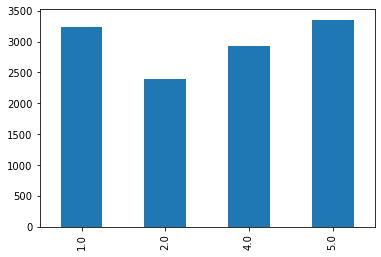

In [135]:
new_df["rating"].value_counts().sort_index().plot.bar()

#### Average rating per product

<AxesSubplot:title={'center':'average rating'}, ylabel='Frequency'>

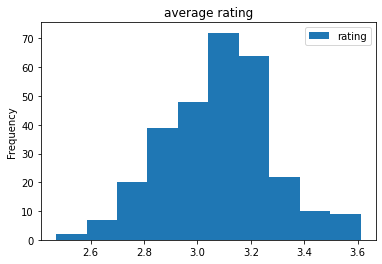

In [140]:
new_df[["prod_id", "rating"]].groupby(["prod_id"], as_index=False).mean().plot(kind='hist', title="average rating")

Overall, the average rating of product is close to 3.0 (which is considered `neutral`)

### polarity

#### Overall polarity distribution

<AxesSubplot:>

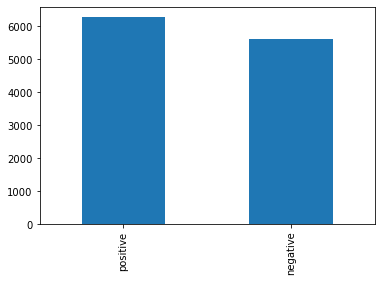

In [143]:
new_df["polarity"].value_counts().plot.bar()

Overall there are nearly as many `positive` reviews than `negative` reviews in the dataset

#### Average `positive`/`negative` ratio

In [168]:
def calc_polarity_ratio():
    all_ = new_df.groupby(["prod_id"], as_index=False).count().sort_values(by="prod_id")[["prod_id", "polarity"]]
    positive = new_df[new_df["polarity"] == "positive"].groupby(["prod_id"], as_index=False).count().sort_values(by="prod_id")[["prod_id", "polarity"]]
    negative = new_df[new_df["polarity"] == "negative"].groupby(["prod_id"], as_index=False).count().sort_values(by="prod_id")[["prod_id", "polarity"]]
    all_["ratio"] = (positive["polarity"]/all_["polarity"]) / (negative["polarity"]/all_["polarity"])
    return all_[["prod_id", "ratio"]]

In [169]:
polarity_ratio = calc_polarity_ratio()

<AxesSubplot:title={'center':'positive/negative decimal ratio'}, ylabel='Frequency'>

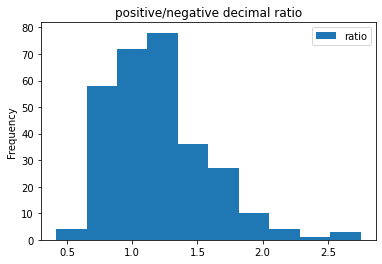

In [192]:
polarity_ratio.plot(kind='hist', title="positive/negative decimal ratio")

In [189]:
(2.75).as_integer_ratio(), (0.5).as_integer_ratio()

((11, 4), (1, 2))

The closer the value is to 0, the smaller the `positive`/`negative`ratio is.

* `2.75` corresponds to ratio of 11 `positive` to 4 `negative`
* `0.50` corresponds to ratio of 1 `positive` to 2 `negative`

Overall, there is about the same number of `positive` reviews ans `negative` reviews for each product.

### review_len

#### Distribution of review lengths

<AxesSubplot:ylabel='Frequency'>

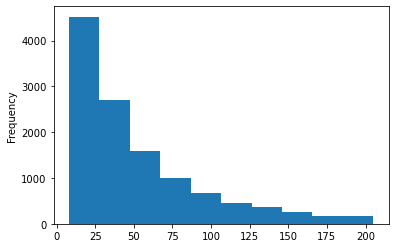

In [193]:
new_df["review_len"].plot.hist()

In [194]:
new_df["review_len"].describe()

count    11901.000000
mean        51.545080
std         42.351095
min          8.000000
25%         21.000000
50%         36.000000
75%         69.000000
max        205.000000
Name: review_len, dtype: float64

## Create `train` and `valid` sets

In [251]:
all_categories = new_df["category"].unique()

In [276]:
new_train = None
new_valid = None
train_ratio = 0.85
for catg in all_categories:
    data = new_df[new_df["category"] == catg].copy()
    prod_ids = pd.Series(data["prod_id"].unique()).to_frame().sample(frac=1, random_state=42).values
    num_prods = prod_ids.shape[0]
    # Update train dataset 
    train_data = data[data["prod_id"].apply(lambda x: str(x) in prod_ids[:int(round(train_ratio*num_prods, 0))])]
    new_train = pd.concat([train_data, new_train])
    # Update valid dataset
    valid_data = data[data["prod_id"].apply(lambda x: str(x) in prod_ids[int(round(train_ratio*num_prods, 0)):])]
    new_valid = pd.concat([valid_data, new_valid])

new_train = new_train.sort_values(by=["category", "prod_id"])
new_valid = new_valid.sort_values(by=["category", "prod_id"])

assert new_train.shape[0] + new_valid.shape[0] == new_df.shape[0]
assert np.intersect1d(new_train["prod_id"].unique(), new_valid["prod_id"].unique()).shape[0] == 0

In [277]:
round(100 * new_train.shape[0]/new_df.shape[0],2), round(100 * new_valid.shape[0]/new_df.shape[0], 2)

(80.38, 19.62)

In [293]:
new_train.shape

(9562, 7)

In [278]:
new_train.head()

,category,prod_id,rating,polarity,review,review_len,review_id
281,All_Beauty,B005U5KU46,5.0,positive,"These are very thin, pull off easily without r...",45,0
282,All_Beauty,B005U5KU46,1.0,negative,sweat went right thought within almost 2 hrs o...,14,1
283,All_Beauty,B005U5KU46,2.0,negative,So far they haven't really worked - won't stic...,15,2
284,All_Beauty,B005U5KU46,5.0,positive,"I have tried several brands of shields, and mo...",46,3
285,All_Beauty,B005U5KU46,1.0,negative,They do not stick well to the fabric. Bunch up...,12,4


In [294]:
new_valid.shape

(2334, 7)

In [279]:
new_valid.head()

,category,prod_id,rating,polarity,review,review_len,review_id
71,All_Beauty,B00J2AJ3U2,4.0,positive,I USE THIS ON MY SUN DAMAGE BROWN SPOTS ON MY ...,29,0
72,All_Beauty,B00J2AJ3U2,1.0,negative,Did not work for me. I finished 1 bottle and s...,13,1
73,All_Beauty,B00J2AJ3U2,4.0,positive,This cream has a nice light citrus scent and i...,67,2
74,All_Beauty,B00J2AJ3U2,1.0,negative,does not seem to work. no visible difference ...,33,3
75,All_Beauty,B00J2AJ3U2,5.0,positive,Works great for lightening those liver spots a...,20,4


#### Save datasets

In [280]:
new_train.to_csv("../data/raw/20221020_amazon_reviews_train.v2.csv", index=False)
new_valid.to_csv("../data/raw/20221020_amazon_reviews_valid.v2.csv", index=False)